In [1]:
############Imports##########
import sys
from createDS import dataset
from make_model_pipeline import make_model
from test_pipeline import tester
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

/Users/michael.rowe/Personal/LSTM_StockPred/venvname/lib/python3.10/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
2025-07-14 23:11:32.367462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
###########Create Dataset########
asml = dataset('ASML','6mo','OG') #stock, period, training data
X_train, X_test, y_train, y_test, todays_data = asml.split(.8) #what train test split

In [3]:
##########Define model hyperparameters#########
optimizer = "adam"
loss = "mean_squared_error"
epochs = 24 # Extremely low amount for testing purposes
batch_size = 8

stock = asml.ticker
period = asml.period
train_data_name = asml.indicators_keyword
train_data = list(X_train.columns.values)
start_data = str(X_train.iloc[0]).split("Name:")[-1].split(", ")[0]
end_data = str(X_train.iloc[-1]).split("Name:")[-1].split(", ")[0]
num_train_points = len(X_train)

model_name = "LSTM3"

In [4]:
##########Model############
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(rate = 0.2))

##add 2nd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 3rd lstm layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(rate = 0.2))
##add 4th lstm layer
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(units = 1))

model.compile(optimizer = optimizer, loss = loss)

# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [5]:
##########Train model###########
model.fit(x = X_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/24
9/9 [==============================] - 8s 16ms/step - loss: 0.0010
Epoch 2/24
9/9 [==============================] - 0s 14ms/step - loss: 9.4854e-04
Epoch 3/24
9/9 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 4/24
9/9 [==============================] - 0s 13ms/step - loss: 0.0010
Epoch 5/24
9/9 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 6/24
9/9 [==============================] - 0s 13ms/step - loss: 9.7666e-04
Epoch 7/24
9/9 [==============================] - 0s 14ms/step - loss: 9.4687e-04
Epoch 8/24
9/9 [==============================] - 0s 13ms/step - loss: 9.7589e-04
Epoch 9/24
9/9 [==============================] - 0s 13ms/step - loss: 9.7532e-04
Epoch 10/24
9/9 [==============================] - 0s 14ms/step - loss: 9.6706e-04
Epoch 11/24
9/9 [==============================] - 0s 14ms/step - loss: 9.6443e-04
Epoch 12/24
9/9 [==============================] - 0s 14ms/step - loss: 9.5142e-04
Epoch 13/24
9/9 [============

1/1 [==============================] - 2s 2s/step
    Prediction    Actual     Error  Right Direction
0    -0.001962  0.002343  0.004304            False
1    -0.001834 -0.006709  0.004875             True
2    -0.001669  0.030653  0.032322            False
3    -0.001678  0.043144  0.044822            False
4    -0.002268  0.002311  0.004580            False
5    -0.002365 -0.021037  0.018671             True
6    -0.002281 -0.002681  0.000401             True
7    -0.002207  0.006835  0.009041            False
8    -0.002154 -0.013626  0.011472             True
9    -0.002015  0.011538  0.013553            False
10   -0.001941 -0.006366  0.004425             True
11   -0.001816 -0.011844  0.010028             True
12   -0.001642  0.011476  0.013119            False
13   -0.001554  0.007216  0.008770            False
14   -0.001489  0.002826  0.004314            False
15   -0.001426 -0.000200  0.001226             True
16   -0.001334  0.005986  0.007320            False
This model got

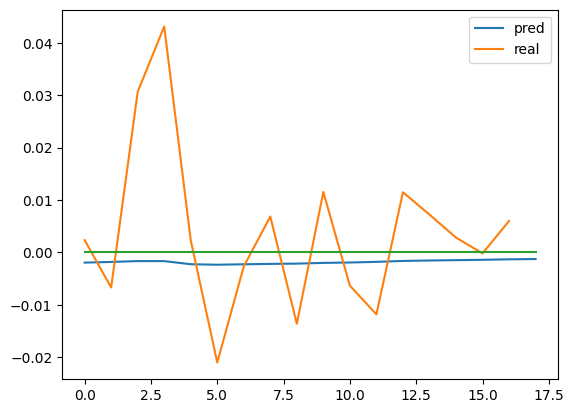

In [6]:
###############Testing pipeline############
X_preds = model.predict(X_test)
my_tester1 = tester(y_test,X_preds,model,X_test)
my_tester1.compare()
my_tester1.plot()

1/1 [==============================] - 0s 32ms/step
[[-0.00054232]]
1/1 [==============================] - 0s 32ms/step
[[0.00033279]]
1/1 [==============================] - 0s 31ms/step
[[0.00312392]]
1/1 [==============================] - 0s 30ms/step
[[0.01021863]]
1/1 [==============================] - 0s 30ms/step
[[0.01563825]]
1/1 [==============================] - 0s 31ms/step
[[0.01402898]]
1/1 [==============================] - 0s 31ms/step
[[0.01040475]]
1/1 [==============================] - 0s 29ms/step
[[0.0060275]]
1/1 [==============================] - 0s 29ms/step
[[0.00051124]]
1/1 [==============================] - 0s 29ms/step
[[-0.0024534]]
1/1 [==============================] - 0s 40ms/step
[[-0.00558789]]
1/1 [==============================] - 0s 38ms/step
[[-0.00828325]]
1/1 [==============================] - 0s 59ms/step
[[-0.01021158]]
1/1 [==============================] - 0s 38ms/step
[[-0.00961401]]
1/1 [==============================] - 0s 58ms/step
[[-0.0

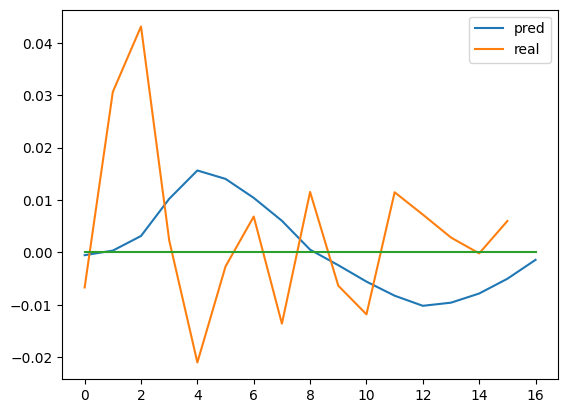

In [7]:
##############Incremental Updating###########
#Might want to do this after saving the model
incremental_predictions,y_actuals = my_tester1.incremental_updating()
my_tester2 = tester(y_actuals,incremental_predictions,model,X_test)

my_tester2.compare()
my_tester2.plot()



In [8]:
###########Save Model###########
pipeline = make_model(model_name,model,optimizer,loss,epochs,batch_size,stock,period,train_data_name,train_data,start_data,end_data,num_train_points)
pipeline.save_model()

Saving model: LSTM3


In [9]:
##########Create Record#########
pipeline.create_record()